In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2015 = pd.read_csv('2015.csv')

In [3]:
df2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
df2015['Country']

0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object

In [5]:
df2019 = pd.read_csv('2019.csv')

In [6]:
df2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [7]:
df2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
df2019 = df2019.rename(columns={"Overall rank": "Happiness Rank", "Country or region": "Country", 
                       "Score": "Happiness Score", "GDP per capita": "Economy (GDP per Capita)", 
                       "Healthy life expectancy": "Health (Life Expectancy)", "Freedom to make life choices": "Freedom", 
                       "Perceptions of corruption": "Trust (Government Corruption)"})

In [10]:
df2019.columns

Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)'],
      dtype='object')

In [11]:
country_keys = df2015[['Country','Region']]

In [12]:
df2019 = df2019.merge(country_keys,on='Country')

In [13]:
df2015['Year'] = 2015

In [14]:
df2019['Year'] = 2019

In [15]:
alldf = pd.concat([df2015,df2019],ignore_index=True)

In [16]:
numerical_data = alldf[['Year','Happiness Score','Economy (GDP per Capita)', 'Social support','Health (Life Expectancy)', 'Freedom', 'Generosity','Trust (Government Corruption)']]

In [17]:
numerical_data

Year  Happiness Score  Economy (GDP per Capita)  Social support  \
0    2015            7.587                   1.39651             NaN   
1    2015            7.561                   1.30232             NaN   
2    2015            7.527                   1.32548             NaN   
3    2015            7.522                   1.45900             NaN   
4    2015            7.427                   1.32629             NaN   
..    ...              ...                       ...             ...   
302  2019            3.380                   0.28700           1.163   
303  2019            3.334                   0.35900           0.711   
304  2019            3.231                   0.47600           0.885   
305  2019            3.203                   0.35000           0.517   
306  2019            3.083                   0.02600           0.000   

     Health (Life Expectancy)  Freedom  Generosity  \
0                     0.94143  0.66557     0.29678   
1                     0.94784  0.62877     0.43630   
2                     0.87464  0.64938     0.34139   
3                     0.88521  0.66973     0.34699   
4                     0.90563  0.63297     0.45811   
..                        ...      ...         ...   
302                   0.46300  0.14300     0.10800   
303                   0.61400  0.55500     0.21700   
304                   0.49900  0.41700     0.27600   
305                   0.36100  0.00000     0.15800   
306                   0.10500  0.22500     0.23500   

     Trust (Government Corruption)  
0                          0.41978  
1                          0.14145  
2                          0.48357  
3                          0.36503  
4                          0.32957  
..                             ...  
302                        0.07700  
303                        0.41100  
304                        0.14700  
305                        0.02500  
306                        0.03500  

[307 rows x 8 columns]

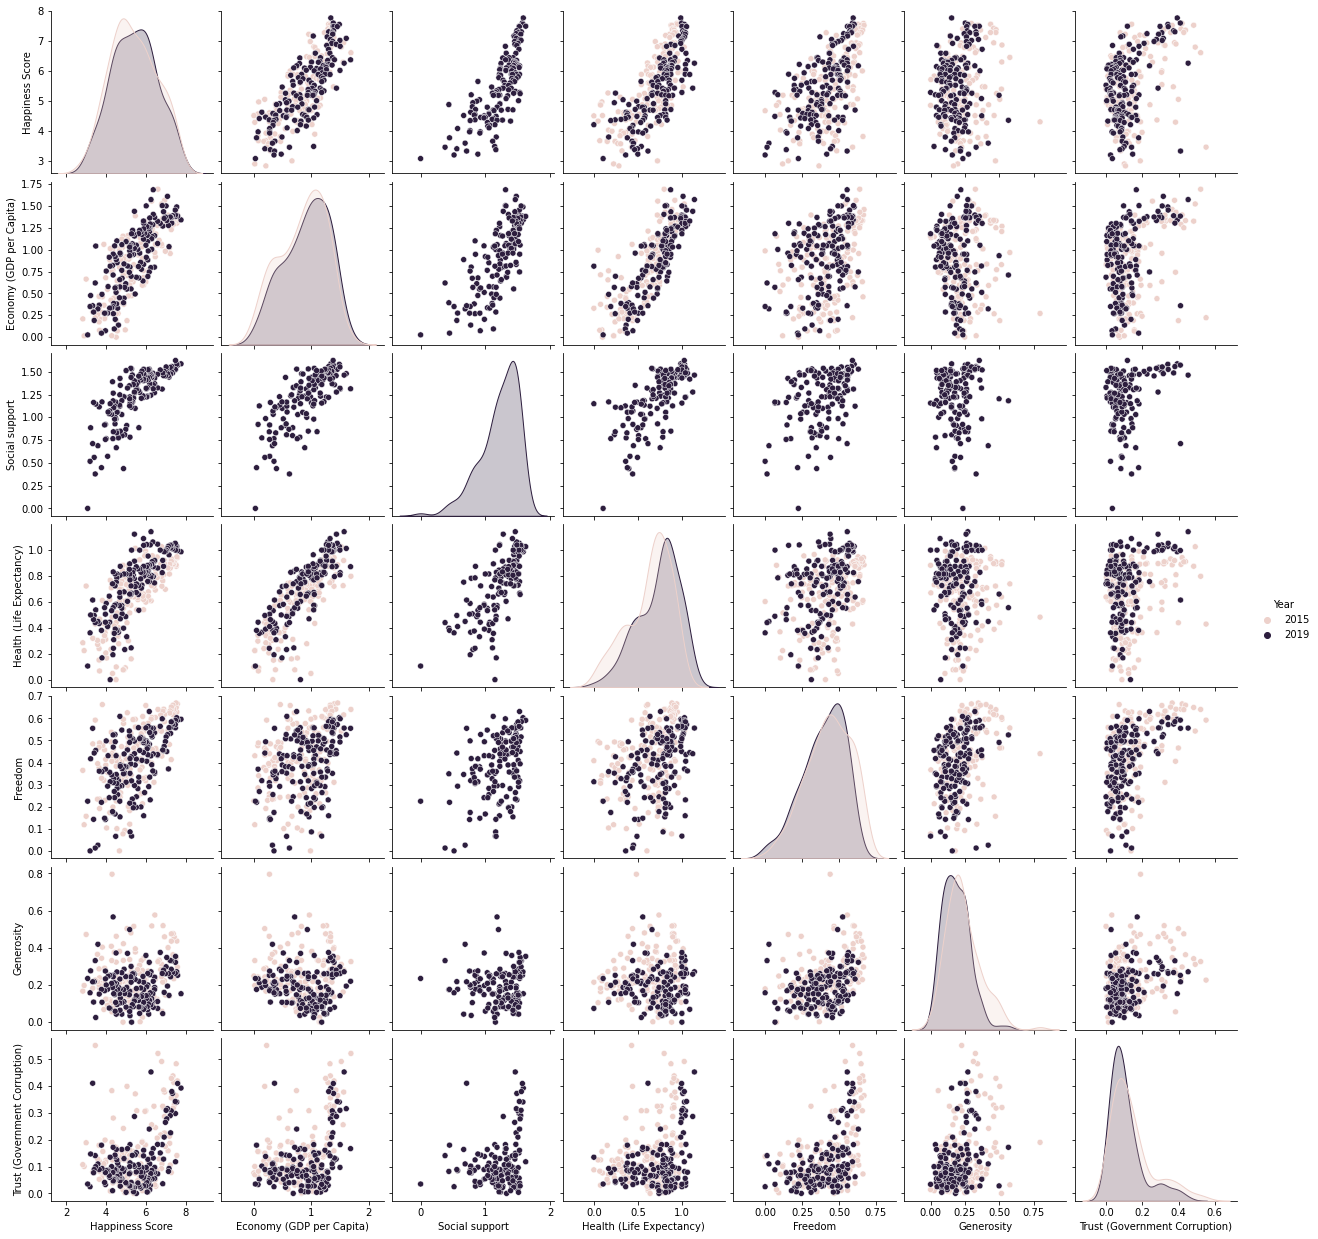

In [18]:
sns.pairplot(numerical_data,hue='Year')
plt.savefig('pair.png')
plt.show()

In [19]:
alldf.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  Year  Social support  
0     0.29678            2.51738  2015             NaN  
1     0.43630            2.70201  2015             NaN  
2     0.34139            2.49204  2015             NaN  
3     0.34699            2.46531  2015             NaN  
4     0.45811            2.45176  2015             NaN

In [20]:
alldf.tail()

Country                           Region  \
302                     Yemen  Middle East and Northern Africa   
303                    Rwanda               Sub-Saharan Africa   
304                  Tanzania               Sub-Saharan Africa   
305               Afghanistan                    Southern Asia   
306  Central African Republic               Sub-Saharan Africa   

     Happiness Rank  Happiness Score  Standard Error  \
302             151            3.380             NaN   
303             152            3.334             NaN   
304             153            3.231             NaN   
305             154            3.203             NaN   
306             155            3.083             NaN   

     Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
302                     0.287     NaN                     0.463    0.143   
303                     0.359     NaN                     0.614    0.555   
304                     0.476     NaN                     0.499    0.417   
305                     0.350     NaN                     0.361    0.000   
306                     0.026     NaN                     0.105    0.225   

     Trust (Government Corruption)  Generosity  Dystopia Residual  Year  \
302                          0.077       0.108                NaN  2019   
303                          0.411       0.217                NaN  2019   
304                          0.147       0.276                NaN  2019   
305                          0.025       0.158                NaN  2019   
306                          0.035       0.235                NaN  2019   

     Social support  
302           1.163  
303           0.711  
304           0.885  
305           0.517  
306           0.000

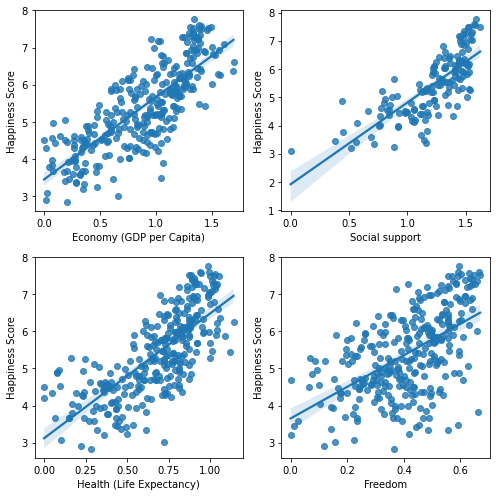

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(7, 7))
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=alldf, ax=axs[0,0])
sns.regplot(x='Social support', y='Happiness Score', data=alldf, ax=axs[0,1])
sns.regplot(x='Health (Life Expectancy)',y='Happiness Score', data=alldf, ax=axs[1,0])
sns.regplot(x='Freedom',y='Happiness Score', data=alldf, ax=axs[1,1])
plt.savefig('corre.png')
plt.tight_layout()

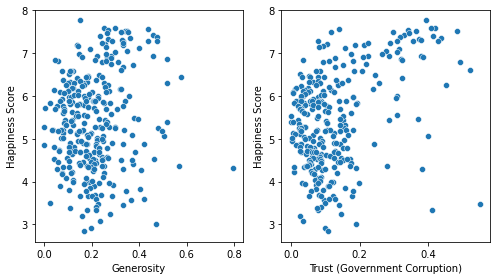

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(7, 4))
sns.scatterplot(x='Generosity', y='Happiness Score', data=alldf, ax=axs[0])
sns.scatterplot(x='Trust (Government Corruption)', y='Happiness Score', data=alldf, ax=axs[1])
plt.savefig('uncorre.png')
plt.tight_layout()

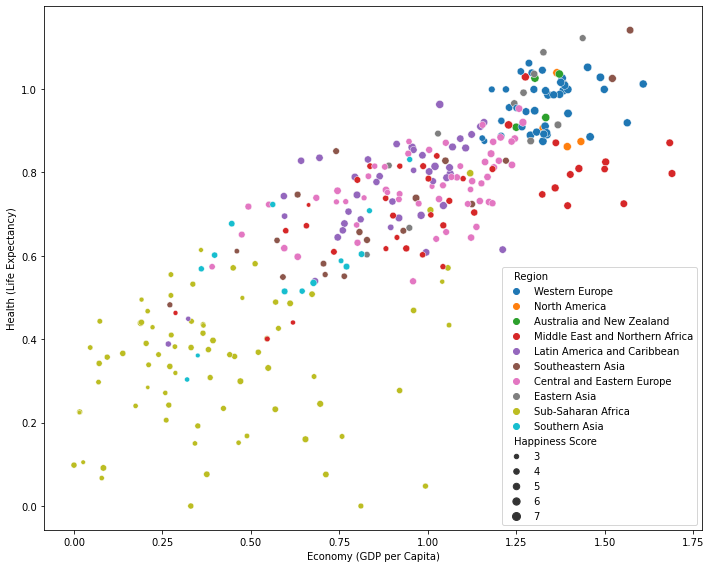

In [23]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', data=alldf,hue='Region',size='Happiness Score')
plt.savefig('health-eco.png')
plt.tight_layout()

In [24]:
sel = alldf[(alldf['Region'] == 'Sub-Saharan Africa') | (alldf['Region'] == 'Southern Asia') | (alldf['Region'] == 'Western Europe') | (alldf['Region'] == 'North America')]


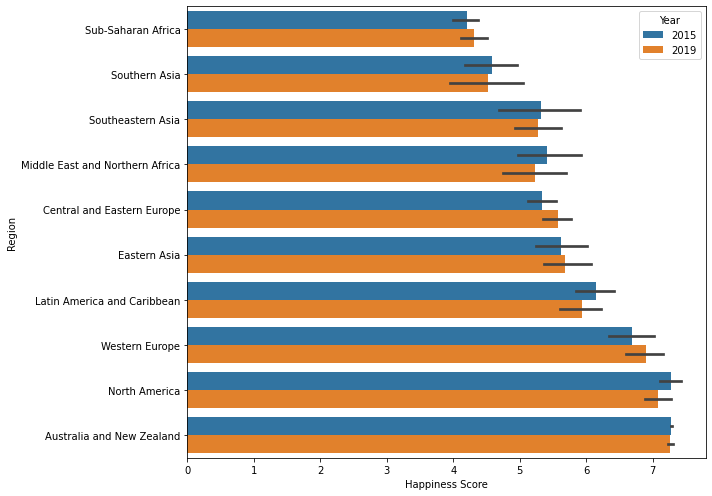

In [25]:
order = alldf.groupby(["Region"])['Happiness Score'].mean().sort_values().index
plt.subplots(figsize=(10, 7))
sns.barplot(data=alldf,y='Region',x='Happiness Score',hue='Year',order=order)
plt.tight_layout()
plt.savefig('happy_year.png')
plt.show()

In [26]:
alldf

Country                           Region  \
0                 Switzerland                   Western Europe   
1                     Iceland                   Western Europe   
2                     Denmark                   Western Europe   
3                      Norway                   Western Europe   
4                      Canada                    North America   
..                        ...                              ...   
302                     Yemen  Middle East and Northern Africa   
303                    Rwanda               Sub-Saharan Africa   
304                  Tanzania               Sub-Saharan Africa   
305               Afghanistan                    Southern Asia   
306  Central African Republic               Sub-Saharan Africa   

     Happiness Rank  Happiness Score  Standard Error  \
0                 1            7.587         0.03411   
1                 2            7.561         0.04884   
2                 3            7.527         0.03328   
3                 4            7.522         0.03880   
4                 5            7.427         0.03553   
..              ...              ...             ...   
302             151            3.380             NaN   
303             152            3.334             NaN   
304             153            3.231             NaN   
305             154            3.203             NaN   
306             155            3.083             NaN   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
302                   0.28700      NaN                   0.46300  0.14300   
303                   0.35900      NaN                   0.61400  0.55500   
304                   0.47600      NaN                   0.49900  0.41700   
305                   0.35000      NaN                   0.36100  0.00000   
306                   0.02600      NaN                   0.10500  0.22500   

     Trust (Government Corruption)  Generosity  Dystopia Residual  Year  \
0                          0.41978     0.29678            2.51738  2015   
1                          0.14145     0.43630            2.70201  2015   
2                          0.48357     0.34139            2.49204  2015   
3                          0.36503     0.34699            2.46531  2015   
4                          0.32957     0.45811            2.45176  2015   
..                             ...         ...                ...   ...   
302                        0.07700     0.10800                NaN  2019   
303                        0.41100     0.21700                NaN  2019   
304                        0.14700     0.27600                NaN  2019   
305                        0.02500     0.15800                NaN  2019   
306                        0.03500     0.23500                NaN  2019   

     Social support  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
..              ...  
302           1.163  
303           0.711  
304           0.885  
305           0.517  
306           0.000  

[307 rows x 14 columns]

In [27]:
dfmerge = df2015.merge(df2019,on=['Country','Region'],suffixes=('_2015', '_2019'))

In [28]:
dfmerge.head()

Country          Region  Happiness Rank_2015  Happiness Score_2015  \
0  Switzerland  Western Europe                    1                 7.587   
1      Iceland  Western Europe                    2                 7.561   
2      Denmark  Western Europe                    3                 7.527   
3       Norway  Western Europe                    4                 7.522   
4       Canada   North America                    5                 7.427   

   Standard Error  Economy (GDP per Capita)_2015   Family  \
0         0.03411                        1.39651  1.34951   
1         0.04884                        1.30232  1.40223   
2         0.03328                        1.32548  1.36058   
3         0.03880                        1.45900  1.33095   
4         0.03553                        1.32629  1.32261   

   Health (Life Expectancy)_2015  Freedom_2015  \
0                        0.94143       0.66557   
1                        0.94784       0.62877   
2                        0.87464       0.64938   
3                        0.88521       0.66973   
4                        0.90563       0.63297   

   Trust (Government Corruption)_2015  ...  Year_2015  Happiness Rank_2019  \
0                             0.41978  ...       2015                    6   
1                             0.14145  ...       2015                    4   
2                             0.48357  ...       2015                    2   
3                             0.36503  ...       2015                    3   
4                             0.32957  ...       2015                    9   

   Happiness Score_2019  Economy (GDP per Capita)_2019  Social support  \
0                 7.480                          1.452           1.526   
1                 7.494                          1.380           1.624   
2                 7.600                          1.383           1.573   
3                 7.554                          1.488           1.582   
4                 7.278                          1.365           1.505   

   Health (Life Expectancy)_2019  Freedom_2019  Generosity_2019  \
0                          1.052         0.572            0.263   
1                          1.026         0.591            0.354   
2                          0.996         0.592            0.252   
3                          1.028         0.603            0.271   
4                          1.039         0.584            0.285   

   Trust (Government Corruption)_2019  Year_2019  
0                               0.343       2019  
1                               0.118       2019  
2                               0.410       2019  
3                               0.341       2019  
4                               0.308       2019  

[5 rows x 22 columns]

In [29]:
dfmerge['Economy_growth'] = (dfmerge['Economy (GDP per Capita)_2019'] - dfmerge['Economy (GDP per Capita)_2015'])/dfmerge['Economy (GDP per Capita)_2015']*100

In [30]:
dfmerge['Life_growth'] = (dfmerge['Health (Life Expectancy)_2019'] - dfmerge['Health (Life Expectancy)_2015'])/dfmerge['Health (Life Expectancy)_2015']*100

In [31]:
dfmerge.head()

Country          Region  Happiness Rank_2015  Happiness Score_2015  \
0  Switzerland  Western Europe                    1                 7.587   
1      Iceland  Western Europe                    2                 7.561   
2      Denmark  Western Europe                    3                 7.527   
3       Norway  Western Europe                    4                 7.522   
4       Canada   North America                    5                 7.427   

   Standard Error  Economy (GDP per Capita)_2015   Family  \
0         0.03411                        1.39651  1.34951   
1         0.04884                        1.30232  1.40223   
2         0.03328                        1.32548  1.36058   
3         0.03880                        1.45900  1.33095   
4         0.03553                        1.32629  1.32261   

   Health (Life Expectancy)_2015  Freedom_2015  \
0                        0.94143       0.66557   
1                        0.94784       0.62877   
2                        0.87464       0.64938   
3                        0.88521       0.66973   
4                        0.90563       0.63297   

   Trust (Government Corruption)_2015  ...  Happiness Score_2019  \
0                             0.41978  ...                 7.480   
1                             0.14145  ...                 7.494   
2                             0.48357  ...                 7.600   
3                             0.36503  ...                 7.554   
4                             0.32957  ...                 7.278   

   Economy (GDP per Capita)_2019  Social support  \
0                          1.452           1.526   
1                          1.380           1.624   
2                          1.383           1.573   
3                          1.488           1.582   
4                          1.365           1.505   

   Health (Life Expectancy)_2019  Freedom_2019  Generosity_2019  \
0                          1.052         0.572            0.263   
1                          1.026         0.591            0.354   
2                          0.996         0.592            0.252   
3                          1.028         0.603            0.271   
4                          1.039         0.584            0.285   

   Trust (Government Corruption)_2019  Year_2019  Economy_growth  Life_growth  
0                               0.343       2019        3.973477    11.744899  
1                               0.118       2019        5.964740     8.246117  
2                               0.410       2019        4.339560    13.875423  
3                               0.341       2019        1.987663    16.130636  
4                               0.308       2019        2.918668    14.726765  

[5 rows x 24 columns]

In [32]:
dfmerge.iloc[112]

Country                                 Congo (Kinshasa)
Region                                Sub-Saharan Africa
Happiness Rank_2015                                  120
Happiness Score_2015                               4.517
Standard Error                                    0.0368
Economy (GDP per Capita)_2015                          0
Family                                            1.0012
Health (Life Expectancy)_2015                    0.09806
Freedom_2015                                     0.22605
Trust (Government Corruption)_2015               0.07625
Generosity_2015                                  0.24834
Dystopia Residual                                2.86712
Year_2015                                           2015
Happiness Rank_2019                                  127
Happiness Score_2019                               4.418
Economy (GDP per Capita)_2019                      0.094
Social support                                     1.125
Health (Life Expectancy)_2019  

In [33]:
dfmerge[['Economy (GDP per Capita)_2015','Economy (GDP per Capita)_2019','Economy_growth']].sort_values(by=['Economy_growth'])

Economy (GDP per Capita)_2015  Economy (GDP per Capita)_2019  \
138                        0.07850                          0.026   
127                        0.54649                          0.287   
115                        0.33024                          0.268   
21                         1.04424                          0.960   
59                         1.13145                          1.044   
..                             ...                            ...   
87                         0.08308                          0.204   
120                        0.27108                          0.710   
147                        0.01530                          0.046   
122                        0.01604                          0.191   
112                        0.00000                          0.094   

     Economy_growth  
138      -66.878981  
127      -47.483028  
115      -18.846899  
21        -8.067111  
59        -7.729020  
..              ...  
87       145.546461  
120      161.915302  
147      200.653595  
122     1090.773067  
112             inf  

[149 rows x 3 columns]

In [34]:
dfmerge.replace([np.inf, -np.inf], np.nan, inplace=True)

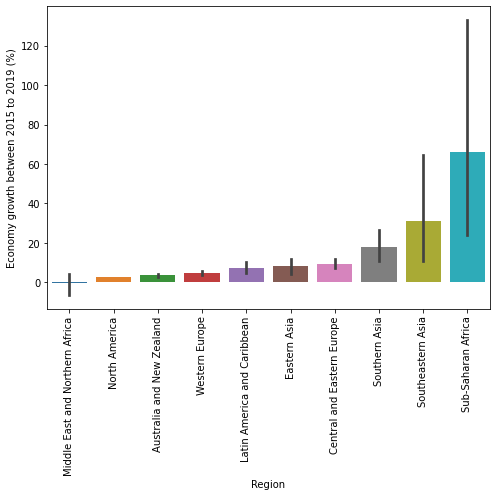

In [35]:
order = dfmerge.groupby(["Region"])['Economy_growth'].mean().sort_values().index
plt.subplots(figsize=(7, 7))
sns.barplot(data=dfmerge,x='Region',y='Economy_growth',order=order)
plt.ylabel('Economy growth between 2015 to 2019 (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('eco_growth.png')
plt.show()

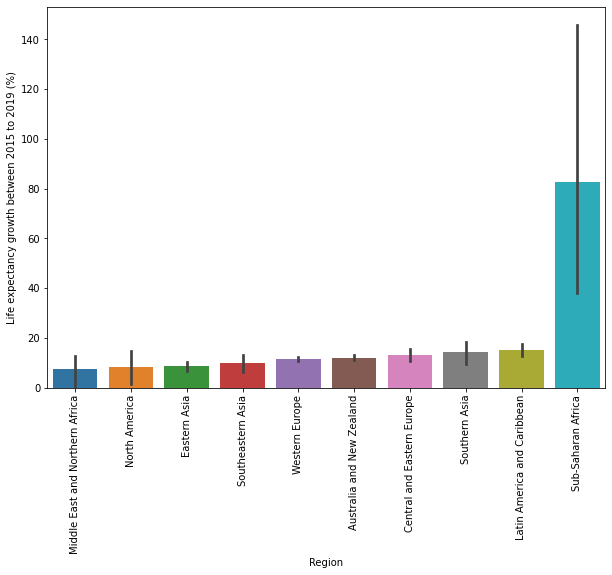

In [36]:
order = dfmerge.groupby(["Region"])['Life_growth'].mean().sort_values().index
plt.subplots(figsize=(10, 7))
sns.barplot(data=dfmerge,x='Region',y='Life_growth',order=order)
plt.ylabel('Life expectancy growth between 2015 to 2019 (%)')
plt.xticks(rotation=90)
plt.savefig('life_growth.png')
plt.show()

In [37]:
dfmerge

Country                           Region  Happiness Rank_2015  \
0    Switzerland                   Western Europe                    1   
1        Iceland                   Western Europe                    2   
2        Denmark                   Western Europe                    3   
3         Norway                   Western Europe                    4   
4         Canada                    North America                    5   
..           ...                              ...                  ...   
144       Rwanda               Sub-Saharan Africa                  154   
145        Benin               Sub-Saharan Africa                  155   
146        Syria  Middle East and Northern Africa                  156   
147      Burundi               Sub-Saharan Africa                  157   
148         Togo               Sub-Saharan Africa                  158   

     Happiness Score_2015  Standard Error  Economy (GDP per Capita)_2015  \
0                   7.587         0.03411                        1.39651   
1                   7.561         0.04884                        1.30232   
2                   7.527         0.03328                        1.32548   
3                   7.522         0.03880                        1.45900   
4                   7.427         0.03553                        1.32629   
..                    ...             ...                            ...   
144                 3.465         0.03464                        0.22208   
145                 3.340         0.03656                        0.28665   
146                 3.006         0.05015                        0.66320   
147                 2.905         0.08658                        0.01530   
148                 2.839         0.06727                        0.20868   

      Family  Health (Life Expectancy)_2015  Freedom_2015  \
0    1.34951                        0.94143       0.66557   
1    1.40223                        0.94784       0.62877   
2    1.36058                        0.87464       0.64938   
3    1.33095                        0.88521       0.66973   
4    1.32261                        0.90563       0.63297   
..       ...                            ...           ...   
144  0.77370                        0.42864       0.59201   
145  0.35386                        0.31910       0.48450   
146  0.47489                        0.72193       0.15684   
147  0.41587                        0.22396       0.11850   
148  0.13995                        0.28443       0.36453   

     Trust (Government Corruption)_2015  ...  Happiness Score_2019  \
0                               0.41978  ...                 7.480   
1                               0.14145  ...                 7.494   
2                               0.48357  ...                 7.600   
3                               0.36503  ...                 7.554   
4                               0.32957  ...                 7.278   
..                                  ...  ...                   ...   
144                             0.55191  ...                 3.334   
145                             0.08010  ...                 4.883   
146                             0.18906  ...                 3.462   
147                             0.10062  ...                 3.775   
148                             0.10731  ...                 4.085   

     Economy (GDP per Capita)_2019  Social support  \
0                            1.452           1.526   
1                            1.380           1.624   
2                            1.383           1.573   
3                            1.488           1.582   
4                            1.365           1.505   
..                             ...             ...   
144                          0.359           0.711   
145                          0.393           0.437   
146                          0.619           0.378   
147                          0.046           0.447   
148                          0.275     

In [38]:
df2015

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  Year  
0       0.29678            2.51738  2015  
1       0.43630            2.70201  2015  
2       0.34139            2.49204  2015  
3       0.34699            2.46531  2015  
4       0.45811            2.45176  2015  
..          ...                ...   ...  
153     0.22628            0.67042  2015  
154     0.18260            1.63328  2015  
155     0.47179            0.32858  2015  
156     0.19727            1.83302  2015  
157     0.16681            1.56726  2015  

[158 rows x 13 columns]

In [39]:
df2015.groupby(["Region"])['Health (Life Expectancy)'].mean()

Region
Australia and New Zealand          0.919965
Central and Eastern Europe         0.718774
Eastern Asia                       0.877388
Latin America and Caribbean        0.703870
Middle East and Northern Africa    0.705616
North America                      0.883710
Southeastern Asia                  0.677357
Southern Asia                      0.540830
Sub-Saharan Africa                 0.282332
Western Europe                     0.909148
Name: Health (Life Expectancy), dtype: float64

In [40]:
df2019.groupby(["Region"])['Health (Life Expectancy)'].mean()

Region
Australia and New Zealand          1.031000
Central and Eastern Europe         0.808500
Eastern Asia                       0.953333
Latin America and Caribbean        0.816800
Middle East and Northern Africa    0.751053
North America                      0.956500
Southeastern Asia                  0.745333
Southern Asia                      0.617000
Sub-Saharan Africa                 0.412056
Western Europe                     1.013850
Name: Health (Life Expectancy), dtype: float64